In [720]:
import numpy as np
from scipy import interpolate
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests import get
import json
from collections import Counter
import re
import os
from dateutil.parser import parse
import operator
from uuid import uuid4
import sys
import geopandas
import shapefile
import probscale

from regressors import stats

In [721]:
from sklearn import metrics, linear_model
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro

In [754]:
#load in data
landdata_location = 'data/joined_combined_filtered_mined_soil_water_df_td_6_4.csv'
#waterusagedata_location = 'data/'
cropdata_location = 'data/cacropyielddata.csv'
#soildata_location1 = 'data/soil_data_east.csv'
#soildata_location2 = 'data/soil_data_west.csv'
#soildata_location3 = 'data/soil_data_750.csv'
#soildata_location4 = 'data/soil_data_740.csv'

ld = pd.read_csv(landdata_location)


/Users/d/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,17,21,37,84) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [756]:
#check out which columns have values, drop the columns with no values
columns = ld.columns.tolist()

i = 0
for c in columns:
    
    nonan = len(ld[c].dropna().tolist())
    print(i, c,':',nonan)
    i+=1
    
    if nonan == 0:
        #print('Dropped:', c)
        ld.drop(c, inplace=True, axis=1)
        
  

0 Unnamed: 0 : 25342
1 Unnamed: 0_x : 25342
2 geoid : 25342
3 parcelnumb : 25342
4 usecode : 22719
5 improvval : 22706
6 landval : 22706
7 parval : 22706
8 owner : 23646
9 owner2 : 5324
10 mailadd : 22721
11 mail_city : 22450
12 mail_state2 : 22527
13 mail_zip : 22527
14 address : 13358
15 saddno : 13358
16 saddpref : 12148
17 saddstr : 13358
18 saddsttyp : 13264
19 sunit : 12
20 scity : 13358
21 original_address : 13348
22 city : 25342
23 county : 25342
24 state2 : 25342
25 szip : 24676
26 address_source : 25342
27 legaldesc : 22181
28 path : 25342
29 ll_uuid : 25342
30 ll_updated_at : 25342
31 homeowner_exemp : 22706
32 lot_area : 22721
33 pers_prop_val : 22706
34 tax_area_code : 23631
35 contract_number : 10393
36 contract_year : 10393
37 non_renewal_year : 187
38 use_high_best : 22719
39 use_secondary : 22719
40 qoz : 25342
41 qoz_tract : 7221
42 ll_gisacre : 25342
43 lng : 25342
44 lat : 25342
45 gdfindex : 25342
46 Acres_x : 25342
47 Crop2016_x : 25342
48 DWR_revise : 3117
49 Sym

In [757]:
ld.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0_x',
 'geoid',
 'parcelnumb',
 'usecode',
 'improvval',
 'landval',
 'parval',
 'owner',
 'owner2',
 'mailadd',
 'mail_city',
 'mail_state2',
 'mail_zip',
 'address',
 'saddno',
 'saddpref',
 'saddstr',
 'saddsttyp',
 'sunit',
 'scity',
 'original_address',
 'city',
 'county',
 'state2',
 'szip',
 'address_source',
 'legaldesc',
 'path',
 'll_uuid',
 'll_updated_at',
 'homeowner_exemp',
 'lot_area',
 'pers_prop_val',
 'tax_area_code',
 'contract_number',
 'contract_year',
 'non_renewal_year',
 'use_high_best',
 'use_secondary',
 'qoz',
 'qoz_tract',
 'll_gisacre',
 'lng',
 'lat',
 'gdfindex',
 'Acres_x',
 'Crop2016_x',
 'DWR_revise',
 'Symb_class',
 'MULTIUSE',
 'CLASS1',
 'SPECOND1',
 'PCNT1',
 'CLASS2',
 'SUBCLASS2',
 'SPECOND2',
 'IRR_TYP2PA',
 'UCF_ATT',
 'CROPTYP1',
 'CROPTYP2',
 'Region',
 'Acres',
 'County',
 'Crop2016',
 'GlobalID',
 'Shape_Leng',
 'Shape_Area',
 'land',
 'imps',
 'pp',
 'mhome',
 'tot',
 'pnumb',
 'firstfloor',
 'secondfloor',
 'adds

In [759]:
#get croplist
set(ld['Crop2016'].tolist())

{'Alfalfa and Alfalfa Mixtures',
 'Almonds',
 'Apples',
 'Avocados',
 'Beans (Dry)',
 'Bush Berries',
 'Carrots',
 'Cherries',
 'Citrus',
 'Cole Crops',
 'Corn, Sorghum and Sudan',
 'Cotton',
 'Dates',
 'Flowers, Nursery and Christmas Tree Farms',
 'Grapes',
 'Greenhouse',
 'Kiwis',
 'Lettuce/Leafy Greens',
 'Melons, Squash and Cucumbers',
 'Miscellaneous Deciduous',
 'Miscellaneous Field Crops',
 'Miscellaneous Grain and Hay',
 'Miscellaneous Grasses',
 'Miscellaneous Subtropical Fruits',
 'Miscellaneous Truck Crops',
 'Mixed Pasture',
 'Olives',
 'Onions and Garlic',
 'Peaches/Nectarines',
 'Pears',
 'Peppers',
 'Pistachios',
 'Plums, Prunes and Apricots',
 'Pomegranates',
 'Rice',
 'Safflower',
 'Strawberries',
 'Sunflowers',
 'Tomatoes',
 'Walnuts',
 'Wheat',
 'Young Perennials'}

Original Approach: crop type -> get net water use per crop/1000 acres -> get  yield per acre per crop -> use to calculate parcel specific values for net water use and yeild -> then use price per unit or value of production/acre to get to a water value?

New Approach:
take acre-feet of water applied per crop and get minimum water volume based on assigned crop and # of acres on parcel. 

In [781]:
#first load in crop yield data
crop_yield = pd.read_csv(cropdata_location)

In [782]:
crop_yield.columns

Index(['Commodity', 'Planted All Purpose Acres', 'Harvested Acres', 'Yield',
       'Production', 'Price per Unit', 'Value of Production in Dollars',
       'Crop Unit Vale ($/acre'],
      dtype='object')

All of the crops are upper case so to make it easy we will upcase all of our crops in the dataframe

In [783]:
ld['Crop2016'] = ld['Crop2016'].str.upper()
our_crops = set(ld['Crop2016'].tolist())
our_crops

{'ALFALFA',
 'ALMONDS',
 'APPLES',
 'AVOCADOS',
 'BEANS, SNAP',
 'BUSH BERRIES',
 'CARROTS',
 'CHERRIES, SWEET',
 'CITRUS',
 'COLE CROPS',
 'CORN, GRAIN',
 'COTTON, COTTONSEED',
 'DATES',
 'FLOWERS, NURSERY AND CHRISTMAS TREE FARMS',
 'GARLIC',
 'GRAPES',
 'GREENHOUSE',
 'HAY, (EXCL ALFALFA)',
 'KIWIS',
 'LETTUCE, HEAD',
 'MELONS, SQUASH AND CUCUMBERS',
 'MISCELLANEOUS DECIDUOUS',
 'MISCELLANEOUS FIELD CROPS',
 'MISCELLANEOUS GRASSES',
 'MISCELLANEOUS SUBTROPICAL FRUITS',
 'MISCELLANEOUS TRUCK CROPS',
 'MIXED PASTURE',
 'OLIVES',
 'PEACHES',
 'PEARS',
 'PEPPERS',
 'PISTACHIOS',
 'POMEGRANATES',
 'PRUNES',
 'RICE',
 'SAFFLOWER',
 'STRAWBERRIES',
 'SUNFLOWER',
 'TOMATOES, IN THE OPEN',
 'WALNUTS',
 'WHEAT',
 'YOUNG PERENNIALS'}

Now let's compare the crops in our crop yield table with our the crops in our dataset

In [784]:
all_crops = set(crop_yield['Commodity'].tolist())
all_crops

{'ALFALFA',
 'ALMONDS',
 'APPLES',
 'APRICOTS',
 'ARTICHOKES',
 'ARTICHOKES, FRESH MARKET',
 'ARTICHOKES, UTILIZED',
 'ASPARAGUS',
 'ASPARAGUS, FRESH MARKET',
 'ASPARAGUS, UTILIZED',
 'BARLEY',
 'BEANS, SNAP',
 'BEANS, SNAP, FRESH MARKET',
 'BEANS, SNAP, PROCESSING',
 'BEANS, SNAP, UTILIZED',
 'BROCCOLI',
 'BROCCOLI, FRESH MARKET',
 'BROCCOLI, PROCESSING',
 'BROCCOLI, UTILIZED',
 'CABBAGE',
 'CABBAGE, FRESH MARKET',
 'CABBAGE, PROCESSING',
 'CABBAGE, UTILIZED',
 'CARROTS',
 'CARROTS, FRESH MARKET',
 'CARROTS, PROCESSING',
 'CARROTS, UTILIZED',
 'CAULIFLOWER',
 'CAULIFLOWER, FRESH MARKET',
 'CAULIFLOWER, PROCESSING',
 'CAULIFLOWER, UTILIZED',
 'CELERY',
 'CELERY, FRESH MARKET',
 'CELERY, PROCESSING',
 'CELERY, UTILIZED',
 'CHERRIES, SWEET',
 'CHICKPEAS',
 'CORN',
 'CORN, GRAIN',
 'CORN, SILAGE',
 'COTTON',
 'COTTON, COTTONSEED',
 'COTTON, PIMA',
 'COTTON, UPLAND',
 'CUCUMBERS',
 'CUCUMBERS, FRESH MARKET',
 'CUCUMBERS, PROCESSING',
 'CUCUMBERS, UTILIZED',
 'GARLIC',
 'GARLIC, FRESH MARKE

In [785]:
overlap = our_crops.intersection(all_crops)
overlap

{'ALFALFA',
 'ALMONDS',
 'APPLES',
 'BEANS, SNAP',
 'CARROTS',
 'CHERRIES, SWEET',
 'CORN, GRAIN',
 'COTTON, COTTONSEED',
 'GARLIC',
 'GRAPES',
 'HAY, (EXCL ALFALFA)',
 'LETTUCE, HEAD',
 'PEACHES',
 'PEARS',
 'PRUNES',
 'RICE',
 'SAFFLOWER',
 'SUNFLOWER',
 'TOMATOES, IN THE OPEN',
 'WHEAT'}

Seems like quite a few are missing, lets see which ones...

In [786]:
our_remaining = our_crops - overlap

all_remaining = all_crops - overlap

print('Crops not matched in our dataset:\n', ', '.join(sorted(list(our_remaining))), '\n')

print('Crops left in the CA dataset:\n', ', '.join(sorted(list(all_remaining))))


Crops not matched in our dataset:
 AVOCADOS, BUSH BERRIES, CITRUS, COLE CROPS, DATES, FLOWERS, NURSERY AND CHRISTMAS TREE FARMS, GREENHOUSE, KIWIS, MELONS, SQUASH AND CUCUMBERS, MISCELLANEOUS DECIDUOUS, MISCELLANEOUS FIELD CROPS, MISCELLANEOUS GRASSES, MISCELLANEOUS SUBTROPICAL FRUITS, MISCELLANEOUS TRUCK CROPS, MIXED PASTURE, OLIVES, PEPPERS, PISTACHIOS, POMEGRANATES, STRAWBERRIES, WALNUTS, YOUNG PERENNIALS 

Crops left in the CA dataset:
 APRICOTS, ARTICHOKES, ARTICHOKES, FRESH MARKET, ARTICHOKES, UTILIZED, ASPARAGUS, ASPARAGUS, FRESH MARKET, ASPARAGUS, UTILIZED, BARLEY, BEANS, SNAP, FRESH MARKET, BEANS, SNAP, PROCESSING, BEANS, SNAP, UTILIZED, BROCCOLI, BROCCOLI, FRESH MARKET, BROCCOLI, PROCESSING, BROCCOLI, UTILIZED, CABBAGE, CABBAGE, FRESH MARKET, CABBAGE, PROCESSING, CABBAGE, UTILIZED, CARROTS, FRESH MARKET, CARROTS, PROCESSING, CARROTS, UTILIZED, CAULIFLOWER, CAULIFLOWER, FRESH MARKET, CAULIFLOWER, PROCESSING, CAULIFLOWER, UTILIZED, CELERY, CELERY, FRESH MARKET, CELERY, PROCESSI

We need to fix some naming issues here for alfalfa, beans, corn, lettuce, 'melons, squash, and cucumber', miscellaneous grain and hay, garlic, peaches, prunes and apricots, potatoes and sweet potatoes, sunflower, we also have to select the crop data which has a value of production in dollars (revenue) value so we can get the value in dollars per acre foot of water applied to the crop. 

In [787]:
ld = ld.replace({'ALFALFA AND ALFALFA MIXTURES':'ALFALFA', 'BEANS (DRY)': 'BEANS, SNAP', 
            'CORN, SORGHUM AND SUDAN':'CORN, GRAIN', 'LETTUCE/LEAFY GREENS':'LETTUCE, HEAD', 
            'MISCELLANEOUS GRAIN AND HAY': 'HAY, (EXCL ALFALFA)', 'ONIONS AND GARLIC': 'GARLIC', 
            'PEACHES/NECTARINES': 'PEACHES', 'PLUMS, PRUNES AND APRICOTS': 'PRUNES', 
            'POTATOES AND SWEET POTATOES': 'POTATOES', 'SUNFLOWERS': 'SUNFLOWER', 'TOMATOES': 'TOMATOES, IN THE OPEN', 
            'COTTON': 'COTTON, COTTONSEED', 'CHERRIES':'CHERRIES, SWEET', 'SQUASH AND CUCUMBERS': 'SQUASH', })



In [788]:
set(ld['Crop2016'].tolist())

{'ALFALFA',
 'ALMONDS',
 'APPLES',
 'AVOCADOS',
 'BEANS, SNAP',
 'BUSH BERRIES',
 'CARROTS',
 'CHERRIES, SWEET',
 'CITRUS',
 'COLE CROPS',
 'CORN, GRAIN',
 'COTTON, COTTONSEED',
 'DATES',
 'FLOWERS, NURSERY AND CHRISTMAS TREE FARMS',
 'GARLIC',
 'GRAPES',
 'GREENHOUSE',
 'HAY, (EXCL ALFALFA)',
 'KIWIS',
 'LETTUCE, HEAD',
 'MELONS, SQUASH AND CUCUMBERS',
 'MISCELLANEOUS DECIDUOUS',
 'MISCELLANEOUS FIELD CROPS',
 'MISCELLANEOUS GRASSES',
 'MISCELLANEOUS SUBTROPICAL FRUITS',
 'MISCELLANEOUS TRUCK CROPS',
 'MIXED PASTURE',
 'OLIVES',
 'PEACHES',
 'PEARS',
 'PEPPERS',
 'PISTACHIOS',
 'POMEGRANATES',
 'PRUNES',
 'RICE',
 'SAFFLOWER',
 'STRAWBERRIES',
 'SUNFLOWER',
 'TOMATOES, IN THE OPEN',
 'WALNUTS',
 'WHEAT',
 'YOUNG PERENNIALS'}

Now we should look at the overlap again and drop the rows that dont overlap

In [789]:
our_crops = set(ld['Crop2016'].tolist())

overlap = our_crops.intersection(all_crops)
print('Matched:', overlap)

Matched: {'PEARS', 'CARROTS', 'ALFALFA', 'RICE', 'PRUNES', 'PEACHES', 'SAFFLOWER', 'COTTON, COTTONSEED', 'ALMONDS', 'TOMATOES, IN THE OPEN', 'CORN, GRAIN', 'WHEAT', 'BEANS, SNAP', 'SUNFLOWER', 'APPLES', 'GARLIC', 'LETTUCE, HEAD', 'GRAPES', 'HAY, (EXCL ALFALFA)', 'CHERRIES, SWEET'}


In [790]:
incrop = list(overlap)

available_crops = ld['Crop2016'].isin(incrop)

matched = ld[available_crops]

In [791]:
len(matched)

17932

So with the current availble crop data we were able to match 14,967 records. Now lets also prune the CA data and merge it into our land data 

In [847]:
available_commodity = crop_yield['Commodity'].isin(incrop)

CA_prune = crop_yield[available_commodity]



In [848]:
#rename columns to merge

CA_prune.rename(columns = {'Commodity': 'FinalCrop'}, inplace=True)
CA_prod = CA_prune[['FinalCrop', 'Price per Unit', 'Value of Production in Dollars',
       'Crop Unit Vale ($/acre']]

matched.rename(columns = {'Crop2016': 'FinalCrop'}, inplace=True)




/Users/d/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [849]:
#now merge

merged = matched.merge(CA_prod, on='FinalCrop')

Checking to see if the values we merged in are correct by crop


In [850]:
print(merged.iloc[0]['FinalCrop'])
print(merged.iloc[0]['Crop Unit Vale ($/acre'])


GRAPES
5840.0


source used for this value
https://pacinst.org/wp-content/uploads/2015/04/CA-Ag-Water-Use.pdf



Now we add two columns to our dataset to hold our applied water in millions of acre feet and our water productivity column and fill in both

In [851]:
merged['water_productivity'] = None


Get total monetary value of crops per parcel using our crop unit value * parcel acres where 'crop unit value' is derived from the per crop CA total production in revenue divided by total harvested acres


In [852]:
merged['Crop Unit Vale ($/acre'] = merged['Crop Unit Vale ($/acre'].astype('float64')

for i, r in merged.iterrows():
    merged.at[i,'Value of Production in Dollars'] = r['Crop Unit Vale ($/acre'] * r['ll_gisacre']
    



Now we need to get the economic value produced per acre-foot of water applied to the crop, as
measured in dollars per acre-foot -- our 'water productivity'

In [853]:
#now divide millions by millions to get a revenue per acre feet of water applied
for i, r in merged.iterrows():

#try:
        
    converted = r['TotalWater'] * 1000000

    merged.at[i, 'water_productivity'] = float(r['Value of Production in Dollars'])/converted

#except:
  

        

In [854]:
merged['water_productivity']

0          0.0338637
1         0.00102725
2          0.0223156
3         0.00118585
4        0.000522347
            ...     
17927    0.000825321
17928     0.00661437
17929    0.000802913
17930     0.00353311
17931    0.000899866
Name: water_productivity, Length: 17932, dtype: object

now lets get minimum water available per parcel by using the acre feet applied per crop * parcel acreage

In [855]:
merged['min_avail_water'] = None

for i, r in merged.iterrows():

    
    merged.at[i, 'min_avail_water'] = r['TotalWater'] * r['ll_gisacre'] 
    


In [856]:
merged['min_avail_water']

0          49.667
1         1.50665
2         32.7297
3         1.73926
4        0.766114
           ...   
17927     11.7083
17928     93.8334
17929     11.3904
17930     50.1217
17931     12.7658
Name: min_avail_water, Length: 17932, dtype: object

Its also worth using the water productivity value to get a potential revenue total value from the number of acres. We can use our min_avail_water in acre-feet and multiply that by our water productivity value to get a min water revenue in dollars...

In [857]:
merged['min_water_rev'] = None

for i, r in merged.iterrows():

    merged.at[i, 'min_water_rev'] = r['min_avail_water'] * r['water_productivity'] 
    


In [858]:
merged['min_water_rev']

0            1.68191
1         0.00154771
2           0.730384
3         0.00206251
4        0.000400177
            ...     
17927     0.00966308
17928       0.620649
17929     0.00914548
17930       0.177085
17931      0.0114875
Name: min_water_rev, Length: 17932, dtype: object

Its time to fold in the soil data

The one we care about in the soil datais 'farmIndcl', which says if it prime farmland or not. as there are seeveral codes for that we are going binarize

In [859]:
set(merged['farmlndcl'].tolist())

{nan,
 'Farmland of statewide importance',
 'Prime farmland if irrigated',
 'Prime farmland if irrigated and drained',
 'Prime farmland if irrigated and reclaimed of excess salts and sodium',
 'Not prime farmland',
 'Prime farmland if irrigated and either protected from flooding or not frequently flooded during the growing season'}

In [860]:
merged['farmlndcl_bin'] = None

for i, r in merged.iterrows():
    
    if r['farmlndcl'] == 'Not prime farmland' or r['farmlndcl'] == 'nan':
        
        merged.at[i, 'farmlndcl_bin'] = 0
        
    else:
        
        merged.at[i, 'farmlndcl_bin'] = 1

In [861]:
merged['ag_revenue'] = None

for i, r in merged.iterrows():
    merged.at[i, 'ag_revenue'] = r['Crop Unit Vale ($/acre'] * r['ll_gisacre']
    

In [862]:
merged.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0_x',
 'geoid',
 'parcelnumb',
 'usecode',
 'improvval',
 'landval',
 'parval',
 'owner',
 'owner2',
 'mailadd',
 'mail_city',
 'mail_state2',
 'mail_zip',
 'address',
 'saddno',
 'saddpref',
 'saddstr',
 'saddsttyp',
 'sunit',
 'scity',
 'original_address',
 'city',
 'county',
 'state2',
 'szip',
 'address_source',
 'legaldesc',
 'path',
 'll_uuid',
 'll_updated_at',
 'homeowner_exemp',
 'lot_area',
 'pers_prop_val',
 'tax_area_code',
 'contract_number',
 'contract_year',
 'non_renewal_year',
 'use_high_best',
 'use_secondary',
 'qoz',
 'qoz_tract',
 'll_gisacre',
 'lng',
 'lat',
 'gdfindex',
 'Acres_x',
 'Crop2016_x',
 'DWR_revise',
 'Symb_class',
 'MULTIUSE',
 'CLASS1',
 'SPECOND1',
 'PCNT1',
 'CLASS2',
 'SUBCLASS2',
 'SPECOND2',
 'IRR_TYP2PA',
 'UCF_ATT',
 'CROPTYP1',
 'CROPTYP2',
 'Region',
 'Acres',
 'County',
 'FinalCrop',
 'GlobalID',
 'Shape_Leng',
 'Shape_Area',
 'land',
 'imps',
 'pp',
 'mhome',
 'tot',
 'pnumb',
 'firstfloor',
 'secondfloor',
 'add

Lets do some work on the land value by summing building land size and excluding those records with a pool

In [863]:
merged['building_size'] = merged['firstfloor'] + merged['secondfloor'] + merged['addsize'] + merged['gize']

#exclude pools
merged.drop(merged[merged['pool'] == True].index, inplace=True)



In [937]:
merged['pool']

0        False
1        False
2        False
3        False
4        False
         ...  
17927    False
17928    False
17929    False
17930    False
17931    False
Name: pool, Length: 17073, dtype: object

now lets try and do some anaysis and take a stab at regression

For our purposes we want to use the following features for hedonic 
regression:

- landval: parcel land value, based on assessor
- ll_gisacre: parcel acreage, as in size
- water_productivity: revenue in dollars per acre feet of water applied based on assigne dcrop to parcel 
- min_avail_water: minimum volume of water available to parcel based on assigned crop
- min_water_rev:
- farmIndcl_bin: is it prime farmland or not? 





In [901]:
hedonic_db = merged[['parcelnumb', 
                     'landval', 
                     'll_gisacre', 
                     'ag_revenue',
                     'water_productivity', 
                     'min_avail_water', 
                     'min_water_rev', 
                     'Crop', 
                     'farmlndcl_bin', 
                     'county', 
                     'szip', 
                     'castorieindex', 
                     'building_size', 
                     'irrcapcl',
                     'irrcapscl',
                     'nirrcapcl',
                     'nirrcalscl',
                    'TotalWater']]  

hedonic_db['landval'] = hedonic_db['landval'].astype('float64')
hedonic_db['ll_gisacre'] = hedonic_db['ll_gisacre'].astype('float64')
hedonic_db['water_productivity'] = hedonic_db['water_productivity'].astype('float64')
hedonic_db['min_avail_water'] = hedonic_db['min_avail_water'].astype('float64')
hedonic_db['min_water_rev'] = hedonic_db['min_water_rev'].astype('float64')
hedonic_db['farmlndcl_bin'] = hedonic_db['farmlndcl_bin'].astype('float64')
hedonic_db['ag_revenue'] = hedonic_db['ag_revenue'].astype('float64')
hedonic_db['castorieindex'] = hedonic_db['castorieindex'].astype('float64')
hedonic_db['building_size'] = hedonic_db['building_size'].astype('float64')
hedonic_db['TotalWater'] = hedonic_db['TotalWater'].astype('float64')






/Users/d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [902]:
hedonic_db.head()
modeling_db = hedonic_db.dropna()

In [903]:
set(modeling_db['farmlndcl_bin'].tolist())

{0.0, 1.0}

In [904]:
len(modeling_db)

9101

In [905]:
modeling_db['landval']

0        207423.0
6        359218.0
7         31632.0
8        147651.0
9        177244.0
           ...   
17927     14986.0
17928      3282.0
17929     15840.0
17930     45517.0
17931    173688.0
Name: landval, Length: 9101, dtype: float64

now lets examine some features

[8312  558  167   39    9    6    2    2    3    3] [      0.   432376.8  864753.6 1297130.4 1729507.2 2161884.  2594260.8
 3026637.6 3459014.4 3891391.2 4323768. ]


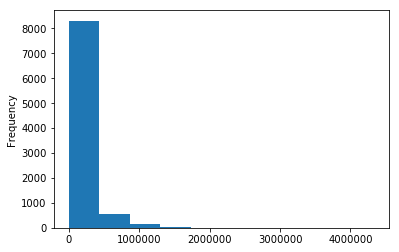

In [906]:
#land value
landval = modeling_db['landval'].dropna()

hist,bin_edges = np.histogram(landval)
print(hist, bin_edges)

#minimum = min(landval)
#print(minimum)
#maximum = max(landval)
#print(maximum)

modeling_db['landval'].dropna().plot.hist(range=[np.min(landval), np.max(landval)])



/Users/d/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


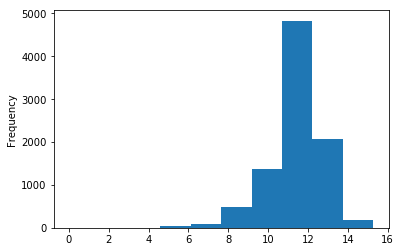

In [907]:
#log transform and replot
ln_landval = np.log(landval)

ln_landval.plot.hist(range=[0, np.max(ln_landval)])


So it looks more normally distributed on a log scale so lets add it to the dataframe

In [908]:
modeling_db['ln_landval'] = np.log(modeling_db['landval'])


/Users/d/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/d/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lets see how correlated the values are before we try and regress them.

In [909]:
modeling_db.corr()

,landval,ll_gisacre,ag_revenue,water_productivity,min_avail_water,min_water_rev,farmlndcl_bin,castorieindex,building_size,irrcapcl,nirrcapcl,TotalWater,ln_landval
landval,1.000000,0.655826,0.581190,0.569342,0.635778,0.500274,-0.047516,-0.128649,0.062181,0.038993,0.104804,0.098309,0.656717
ll_gisacre,0.655826,1.000000,0.873888,0.852285,0.971140,0.805088,-0.029950,-0.249568,-0.047112,0.009352,0.331779,0.140758,0.511661
ag_revenue,0.581190,0.873888,1.000000,0.977357,0.813662,0.882886,-0.038143,-0.192389,-0.044018,0.017781,0.316582,0.073612,0.461885
water_productivity,0.569342,0.852285,0.977357,1.000000,0.751444,0.868372,-0.041220,-0.177416,-0.042350,0.025478,0.280856,-0.028097,0.458116
min_avail_water,0.635778,0.971140,0.813662,0.751444,1.000000,0.748113,-0.025292,-0.254363,-0.045147,0.000743,0.334876,0.252025,0.488698
min_water_rev,0.500274,0.805088,0.882886,0.868372,0.748113,1.000000,-0.048218,-0.163276,-0.024235,0.027368,0.226490,0.048432,0.286326
farmlndcl_bin,-0.047516,-0.029950,-0.038143,-0.041220,-0.025292,-0.048218,1.000000,0.500954,0.021287,-0.453496,-0.099462,-0.027262,-0.001500
castorieindex,-0.128649,-0.249568,-0.192389,-0.177416,-0.254363,-0.163276,0.500954,1.000000,0.039887,-0.494306,-0.476787,-0.226888,-0.062652
building_size,0.062181,-0.047112,-0.044018,-0.042350,-0.045147,-0.024235,0.021287,0.039887,1.000000,-0.004890,-0.045280,-0.024965,0.036844
irrcapcl,0.038993,0.009352,0.017781,0.025478,0.000743,0.027368,-0.453496,-0.494306,-0.004890,1.000000,0.090728,-0.007867,0.001581


So no correlations that would suggest we shouldnt be using these variables. Next up is to try a simple, flawed model to wrap our heads around the results. We can go back and look at feature engineering and comparing log transformations

In [910]:
# for the purposes of this first run we arent going to interpolate nan values, just drop them all 

modeling_db =modeling_db[~modeling_db.isin([np.nan, np.inf, -np.inf]).any(1)]

Now we are going to run a quick regression with equation:

landvalue (log of) = agricultural revenue (acreage X crop revenue per acre) + minimum water access+ minimum water revenue (min water access X water_productivity) + nirrcapcl + irracapcl + TotalWater + building size

In [941]:
y = modeling_db['landval']
y_ln = modeling_db['ln_landval']

#total building space subtracted from land 
modeling_db['less_building'] = modeling_db['ll_gisacre'] - modeling_db['building_size']


X = modeling_db[['ll_gisacre','ag_revenue', 'min_avail_water', 'water_productivity', 'min_water_rev', 'nirrcapcl', 'irrcapcl', 'TotalWater', 'building_size']]



In [942]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ln, test_size=0.2, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [943]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#scaler2 = StandardScaler()
#X_train = pd.DataFrame(scaler2.fit_transform(X_train), columns=X_train.columns)
#X_test = pd.DataFrame(scaler2.transform(X_test), columns=X_test.columns)

In [944]:
ols = LinearRegression()
ols.fit(X_train, y_train)
print("\n================ SUMMARY TABLE WITH P-VALUES for Log Transformed Target Variable =================")
print("R-squared:", ols.score(X_train, y_train))
print("Intercept:", ols.intercept_)
print("Coefficients:", ols.coef_)
print('\n')
xlabels = X.columns
stats.summary(ols, X, y_ln, xlabels)


================ SUMMARY TABLE WITH P-VALUES for Log Transformed Target Variable =================
R-squared: 0.2849173678801201
Intercept: 11.41649743874076
Coefficients: [ 6.19069121e-01 -1.15875201e-01  3.12431564e-02  2.33060454e-01
 -1.59890719e-01  2.63089324e-04  1.54710052e-02  8.04443457e-02]




AttributeError: module 'scipy.stats' has no attribute 'summary'

In [931]:

# Collect the coefficients
df_ols_coef = pd.DataFrame(ols.coef_, index=X_train.columns, columns=['Coefficients'])
df_ols_coef['Coef_abs'] = df_ols_coef.Coefficients.abs()

In [932]:
predictions_train = ols.predict(X_train)
predictions_test = ols.predict(X_test)

In [933]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(ols, X_train, y_train, cv=5)

print('Training Score:', ols.score(X_train, y_train))
print('Cross validation scores:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', ols.score(X_test, y_test))

Training Score: 0.3852365024013199
Cross validation scores: [0.37998728 0.36995059 0.41618436 0.36218624 0.37937581]
Mean cross validation score: 0.3815368570547183
Test Score: 0.36021092503851304


In [934]:
# Shuffled 5-fold cross validation scores are rather similar
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_scores_shuffled = cross_val_score(ols, X_train, y_train, cv=kf)

print('Shuffled cross validation score:', cv_scores_shuffled)
print('Mean shuffled cross validation score:', cv_scores_shuffled.mean())

Shuffled cross validation score: [0.37553739 0.3885377  0.36216949 0.34917776 0.4251093 ]
Mean shuffled cross validation score: 0.3801063275884587


In [935]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_test)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, predictions_test))**0.5)

Mean Squared Error: 1.3235583295016111
Root Mean Squared Error: 1.1504600512410725


In [936]:
ols_residuals = (y_train - predictions_train)
ols_residuals.describe()

count    7.270000e+03
mean    -1.651743e-16
std      1.050648e+00
min     -7.325309e+00
25%     -3.338290e-01
50%      1.442055e-01
75%      5.407288e-01
max      6.273116e+00
Name: ln_landval, dtype: float64

In [938]:
print("Skew:", ols_residuals_0609.skew())
print("Kurtosis:", ols_residuals_0609.kurtosis())
stat, p = shapiro(ols_residuals_0609)
print('Shapiro-Wilk test on normality=%.3f, p=%.3f' % (stat, p))

Skew: -1.2040206446625938
Kurtosis: 3.1857693195854058
Shapiro-Wilk test on normality=0.927, p=0.000


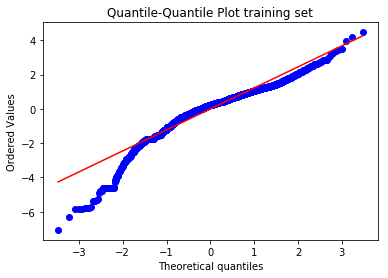

In [939]:
stats.probplot(ols_residuals_0609, dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot training set");

In [940]:
print(X_train)

      ll_gisacre  ag_revenue  min_avail_water  water_productivity  \
0      -0.309028   -0.252008        -0.347341           -0.190383   
1       3.618236    3.794736         2.403080            4.916076   
2      -0.317782   -0.261028        -0.353471           -0.201764   
3      -0.444030   -0.391117        -0.441888           -0.365920   
4      -0.059991    0.004606        -0.172930            0.133431   
...          ...         ...              ...                 ...   
7265    0.499177    0.580786         0.218678            0.860493   
7266   -0.482325   -0.497388        -0.415758           -0.513084   
7267   -0.485721   -0.434076        -0.471086           -0.420128   
7268   -0.550814   -0.500089        -0.509500           -0.512382   
7269   -0.537706   -0.487643        -0.507493           -0.487723   

      min_water_rev  nirrcapcl  irrcapcl  TotalWater  less_building  
0         -0.185558  -0.461628  0.652677   -0.882866      -0.434582  
1          2.854591   2.425696 

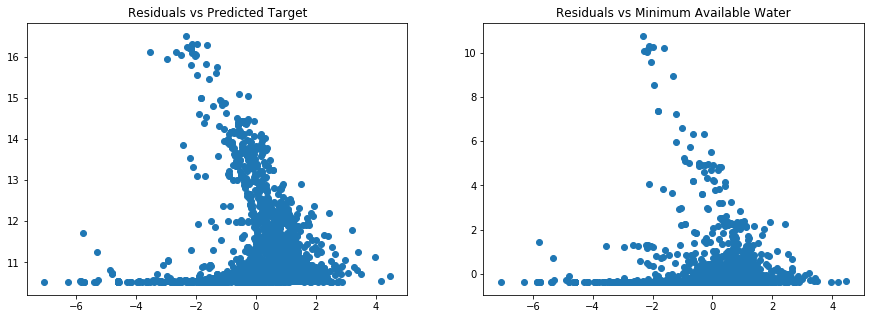

In [735]:

# Plotting the OLS residuals against the predicted-y and 'min_avail_water'. The residuals appear well-behaved
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].scatter(ols_residuals_0609, predictions_train)
ax[0].set_title('Residuals vs Predicted Target', fontsize=12)

ax[1].scatter(ols_residuals_0609, X_train.min_avail_water)
ax[1].set_title('Residuals vs Minimum Available Water', fontsize=12);

In [736]:
# Ridge Cross-Validation
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Best Ridge alpha: 2.782559402207126
Training score: 0.41127066025668224
Test Score: 0.38881805376648815


In [738]:
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()

In [739]:
# Confirmed similar to the above Ridge CV scores
ridge_mod = Ridge(alpha=2.78)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.39843501 0.40126575 0.39400132 0.42401099 0.42191455]
Mean cross-validated training score: 0.40792552621091255
Training Score: 0.4112706758357707
Test Score: 0.3888182806896905


In [740]:
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.005994842503189409
Training score: 0.41094392012938663
Test Score: 0.38775763106522676


In [719]:
df_lasso_coef = pd.DataFrame(lasso_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_lasso_coef['Coef_abs'] = df_lasso_coef.Coefficients.abs()

In [537]:
coef = pd.concat([df_ols_coef['Coefficients'], df_ridge_coef['Coefficients'], df_lasso_coef['Coefficients']])
coef = pd.DataFrame(coef)
coef.reset_index(level=0, inplace=True)
coef.columns = ['variable', 'coefficient']


In [538]:
coef.loc[0:2, "model"] = "ols"
coef.loc[3:5, "model"] = "ridge"
coef.loc[6:9, "model"] = "lasso"